In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
features = np.load('/Users/zhiweideng/Desktop/NICR/DarkVessels/analysis/LSA_h1_subj_1_feat.npy')
print(features.shape)
features = features.reshape((64, -1)).T
print(features.shape)

(64, 60, 124, 124)
(922560, 64)


In [12]:
clustering = KMeans(n_clusters=5, random_state=1).fit(features)

In [13]:
labels = clustering.labels_

In [14]:
print(sum(labels == 0))
print(sum(labels == 1))
print(sum(labels == 2))
print(sum(labels == 3))
print(sum(labels == 4))
print(sum(labels == 5))
print(sum(labels == 6))
print(sum(labels == 7))
print(sum(labels == 8))
print(sum(labels == 9))

588911
142476
51465
74939
64769
0
0
0
0
0


In [15]:
pca = PCA(n_components=2)
pca.fit(features)
coordinates = pca.transform(features)
print(coordinates.shape)

(922560, 2)


In [16]:
def plot_embedding(data, labels, title):
    fig = plt.figure()
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
    for i in range(data.shape[0])[::100]:
        l = labels[i]
        plt.text(data[i, 0], data[i, 1], str(l), color=plt.cm.Set1(l / 10.0))
    plt.title(title)
    return fig

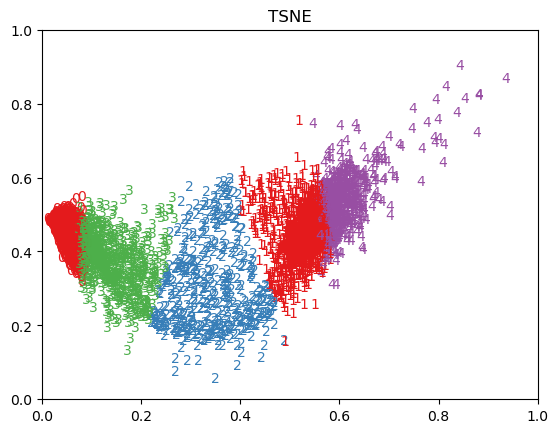

In [17]:
fig = plot_embedding(coordinates, labels, 'TSNE')
plt.show()

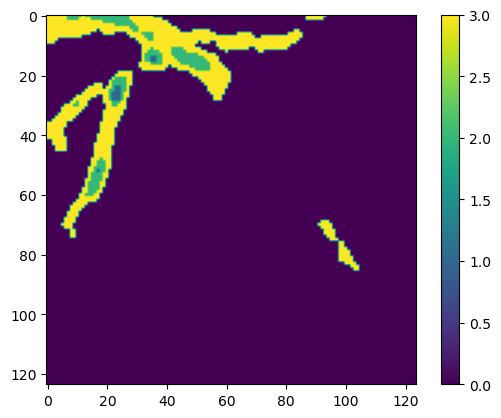

In [27]:
labels = labels.reshape(1, 60, 124, 124)
plt.imshow(labels[0, 15, :, :])
plt.colorbar()
plt.show()